In [1]:
#| Qubit Gates
import qiskit as qs
import math

In [2]:
statevector_simulator = qs.Aer.get_backend("statevector_simulator")
qasm_simulator = qs.Aer.get_backend("qasm_simulator")

In [3]:
# Pauli Gates (X/Y/Z) (pi/2 rotation about axis)
# X-Gate
q_circuit_1 = qs.QuantumCircuit(1)
q_circuit_1.initialize([1, 0], 0)

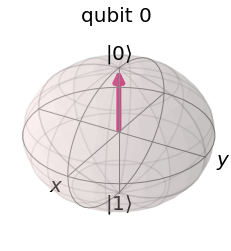

In [4]:
result_1 = qs.execute(q_circuit_1, statevector_simulator).result()
qs.visualization.plot_bloch_multivector(result_1.get_statevector())

In [5]:
# pi/2 Rotation about the X-axis
q_circuit_1.x(0)
q_circuit_1.draw()

┌─────────────────┐┌───┐
q_0: ┤ initialize(1,0) ├┤ X ├
     └─────────────────┘└───┘

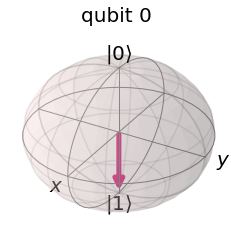

In [6]:
result_2 = qs.execute(q_circuit_1, statevector_simulator).result()
qs.visualization.plot_bloch_multivector(result_2.get_statevector())

In [7]:
# pi/2 Rotation about the Y-axis
q_circuit_1.y(0)
q_circuit_1.draw()

┌─────────────────┐┌───┐┌───┐
q_0: ┤ initialize(1,0) ├┤ X ├┤ Y ├
     └─────────────────┘└───┘└───┘

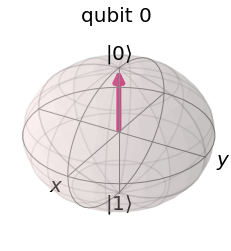

In [8]:
result_3 = qs.execute(q_circuit_1, statevector_simulator).result()
qs.visualization.plot_bloch_multivector(result_3.get_statevector())

In [9]:
# pi/2 Rotation about the Z-axis so no change
q_circuit_1.z(0)
q_circuit_1.draw()

┌─────────────────┐┌───┐┌───┐┌───┐
q_0: ┤ initialize(1,0) ├┤ X ├┤ Y ├┤ Z ├
     └─────────────────┘└───┘└───┘└───┘

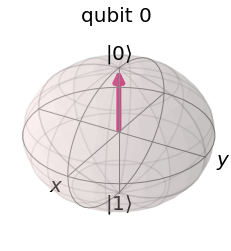

In [10]:
result_4 = qs.execute(q_circuit_1, statevector_simulator).result()
qs.visualization.plot_bloch_multivector(result_4.get_statevector())

In [50]:
q_circuit_2 = qs.QuantumCircuit(1)
# input of |1> to H gate always gives |->
q_circuit_2.initialize([0, 1], 0)
q_circuit_2.h(0)
q_circuit_2.draw()

┌─────────────────┐┌───┐
q_0: ┤ initialize(0,1) ├┤ H ├
     └─────────────────┘└───┘

[ 0.70710678-8.65956056e-17j -0.70710678+8.65956056e-17j]


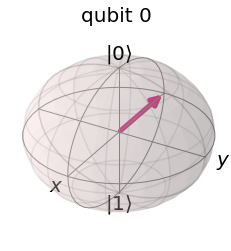

In [51]:
result_5 = qs.execute(q_circuit_2, statevector_simulator).result()
print(result_5.get_statevector())
qs.visualization.plot_bloch_multivector(result_5.get_statevector())

In [52]:
q_circuit_2.z(0)
q_circuit_2.draw()

┌─────────────────┐┌───┐┌───┐
q_0: ┤ initialize(0,1) ├┤ H ├┤ Z ├
     └─────────────────┘└───┘└───┘

[0.70710678-8.65956056e-17j 0.70710678-8.65956056e-17j]


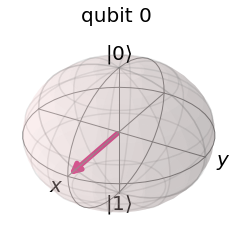

In [53]:
result_6 = qs.execute(q_circuit_2, statevector_simulator).result()
# this shows how Z-axis works when 
print(result_6.get_statevector())
qs.visualization.plot_bloch_multivector(result_6.get_statevector())

In [54]:
q_circuit_2.h(0)
q_circuit_2.draw()
# H*Z*H = X

┌─────────────────┐┌───┐┌───┐┌───┐
q_0: ┤ initialize(0,1) ├┤ H ├┤ Z ├┤ H ├
     └─────────────────┘└───┘└───┘└───┘

[ 1.00000000e+00-1.8369702e-16j -2.22044605e-16+6.1232340e-17j]
{'0': 1.0}


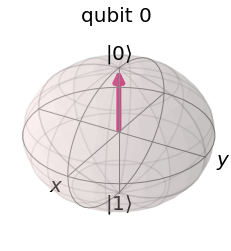

In [55]:
result_7 = qs.execute(q_circuit_2, statevector_simulator).result()
# this shows how Z-axis works when 
print(result_7.get_statevector())
print(result_7.get_counts())
qs.visualization.plot_bloch_multivector(result_7.get_statevector())

In [93]:
# Z-basis is called the computational basis. State 0 or State 1 are what are measured by the quantum computer.
# How do we make measurements on X-basis or Y-basis?\

#Measuring in different bases allows us to see Heisenberg’s famous uncertainty principle in action. Having certainty of measuring a state in the Z-basis removes all certainty of measuring a specific state in the X-basis, and vice versa. A common misconception is that the uncertainty is due to the limits in our equipment, but here we can see the uncertainty is actually part of the nature of the qubit.

# For example, if we put our qubit in the state  |0⟩ , our measurement in the Z-basis is certain to be  |0⟩ , but our measurement in the X-basis is completely random! Similarly, if we put our qubit in the state  |−⟩ , our measurement in the X-basis is certain to be  |−⟩ , but now any measurement in the Z-basis will be completely random.

def x_measurement(q_circuit,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    # applying hadamard on |1> will give |-> and |0> will give |+>
    # measuring will randomly give 0 or 1 so we are not confident of the X/Y components, only Z
    # How do we measure X or Y then?
    # If input is |+> hadamard will always transform it to |0>, now if we measure, we have measured X-component. Probability of getting |0> or |1> after this gives us the measure of |+> or ||->.
    # Applying hadamard again will put it back in |+> and we can continue with the rest of the circuit. (Hadamard is a reversible gate)
    q_circuit.h(qubit)
    q_circuit.measure(qubit, cbit)
    q_circuit.h(qubit)
    return q_circuit

# Initialise our qubit and measure it
q_circuit_3 = qs.QuantumCircuit(1,1)
# q_circuit_3.initialize([0, 1], 0)|
q_circuit_3.initialize([1/math.sqrt(2), -1/math.sqrt(2)], 0)
x_measurement(q_circuit_3, 0, 0)
q_circuit_3.draw()

┌──────────────────────────────┐┌───┐┌─┐┌───┐
q_0: ┤ initialize(0.70711,-0.70711) ├┤ H ├┤M├┤ H ├
     └──────────────────────────────┘└───┘└╥┘└───┘
c: 1/══════════════════════════════════════╩══════
                                           0

{'1': 1}


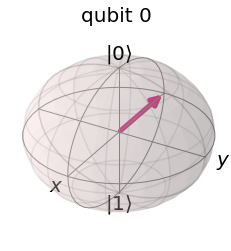

In [94]:
result_8 = qs.execute(q_circuit_3, statevector_simulator).result() # Do the simulation, returning the state vector
print(result_8.get_counts())
qs.visualization.plot_bloch_multivector(result_8.get_statevector()) # Display the output state vector


In [104]:
# R_Z_phi Gate: Makes change to state by rotating it phi angle about the Z axis
q_circuit_4 = qs.QuantumCircuit(1)
q_circuit_4.h(0)
q_circuit_4.draw()

┌───┐
q_0: ┤ H ├
     └───┘

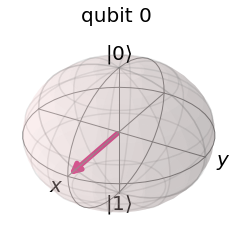

In [105]:
result_9 = qs.execute(q_circuit_4, statevector_simulator).result()
qs.visualization.plot_bloch_multivector(result_9.get_statevector())

In [106]:
q_circuit_4.rz(math.pi/4, 0)
q_circuit_4.draw()

┌───┐┌──────────┐
q_0: ┤ H ├┤ RZ(pi/4) ├
     └───┘└──────────┘

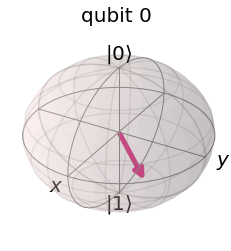

In [107]:
result_10 = qs.execute(q_circuit_4, statevector_simulator).result()
qs.visualization.plot_bloch_multivector(result_10.get_statevector())

In [108]:
# I Gate is just identity gate
# S Gate is pi/2 rotation around Z, S_dagger is -pi/2 rotation around Z
# T Gate is pi/4 rotation around Z, T_dagger is -pi/4 rotation around Z
# State manipulation gates for X and Y basis is also possible but omitted since Z is "computational basis"